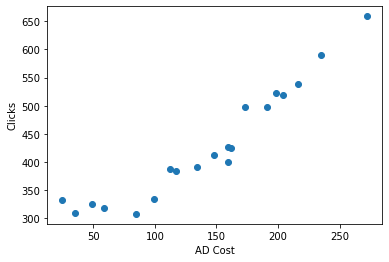

In [75]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline  

# read csv => ndarray
train = np.loadtxt('click.csv', delimiter=',', dtype='int', skiprows=1)

train_x = train[:, 0] 
train_y = train[:, 1] 

plt.plot(train_x, train_y, 'o')
plt.xlabel('AD Cost')
plt.ylabel('Clicks')
plt.show()

## Data Preparation Stage

In [76]:
# standardization
train_z = (train_x - np.mean(train_x)) / np.std(train_x)
print(train_z)

print(train_z.size)
print(np.ones(train_z.size))
print(train_z ** 2)

[ 1.39433428  1.11069026  0.09554325 -1.59139223 -0.8449606   0.93154667
 -1.38239138 -1.74067856  0.46875906  0.73747445 -0.11345761 -0.63595975
 -0.36724436 -0.44188752  0.3045441   1.94669369  0.25975821  0.25975821
 -1.23310505  0.84197488]
20
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1.94416809 1.23363286 0.00912851 2.53252924 0.71395842 0.8677792
 1.91100592 3.02996185 0.21973506 0.54386856 0.01287263 0.4044448
 0.13486842 0.19526458 0.09274711 3.78961632 0.06747433 0.06747433
 1.52054807 0.70892169]


In [77]:
# b = 1
col1 = np.ones(train_z.size)
# x^1
col2 = train_z
# x^2
col3 = train_z ** 2

# vstack: combine as cols 
print(np.vstack([col1, col2, col3]))

# hstack: combine as rows 
# print(np.hstack([col1, col2, col3]))

[[ 1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.        ]
 [ 1.39433428  1.11069026  0.09554325 -1.59139223 -0.8449606   0.93154667
  -1.38239138 -1.74067856  0.46875906  0.73747445 -0.11345761 -0.63595975
  -0.36724436 -0.44188752  0.3045441   1.94669369  0.25975821  0.25975821
  -1.23310505  0.84197488]
 [ 1.94416809  1.23363286  0.00912851  2.53252924  0.71395842  0.8677792
   1.91100592  3.02996185  0.21973506  0.54386856  0.01287263  0.4044448
   0.13486842  0.19526458  0.09274711  3.78961632  0.06747433  0.06747433
   1.52054807  0.70892169]]


In [78]:
# T: transposed matrix
print((np.vstack([col1, col2, col3])).T)

def to_matrix(x):
    return (np.vstack([np.ones(x.size), x, x**2])).T

# f(x) = a + bx + cx²
np.random.seed(0)
seta = np.random.randn(3) # normal distribution => a, b, c

a = seta[0]
b = seta[1]
c = seta[2]
print('a:', a)
print('b:', b)
print('c:', c)

[[ 1.          1.39433428  1.94416809]
 [ 1.          1.11069026  1.23363286]
 [ 1.          0.09554325  0.00912851]
 [ 1.         -1.59139223  2.53252924]
 [ 1.         -0.8449606   0.71395842]
 [ 1.          0.93154667  0.8677792 ]
 [ 1.         -1.38239138  1.91100592]
 [ 1.         -1.74067856  3.02996185]
 [ 1.          0.46875906  0.21973506]
 [ 1.          0.73747445  0.54386856]
 [ 1.         -0.11345761  0.01287263]
 [ 1.         -0.63595975  0.4044448 ]
 [ 1.         -0.36724436  0.13486842]
 [ 1.         -0.44188752  0.19526458]
 [ 1.          0.3045441   0.09274711]
 [ 1.          1.94669369  3.78961632]
 [ 1.          0.25975821  0.06747433]
 [ 1.          0.25975821  0.06747433]
 [ 1.         -1.23310505  1.52054807]
 [ 1.          0.84197488  0.70892169]]
a: 1.764052345967664
b: 0.4001572083672233
c: 0.9787379841057392


In [79]:
print(np.dot([1,2], [1,2])) # 1행 2열 x 1행 2열
print(np.dot([[1,2], [2,3]], [1,2])) # 2행 2열 x 1행 2열
print(np.dot([[1,2],
              [2,3]],
             [[1,2],
              [2,3]])) # 2행 2열 x 2행 2열

5
[5 8]
[[ 5  8]
 [ 8 13]]


In [80]:
# np.dot() vs np.matmul()
# https://m.blog.naver.com/PostView.nhn?blogId=cjh226&logNo=221356884894
y = np.array([[1, 2, 3], [1, 2, 3]])
z = np.array([[1, 2], [3, 4], [5, 6]])

print(np.dot(y, z))
print(y.shape)
print(z.shape)

[[22 28]
 [22 28]]
(2, 3)
(3, 2)


In [81]:
def f(x):
    return np.dot(x, seta) # 1행 3열 x 1행 3열

def E(x, y): 
    err = (y - f(x)) ** 2  # square error
    return np.sum(err) / 2 # reduce error scale  

In [82]:
print(train_z)
x = to_matrix(train_z)
print(x)
print(x.shape)

[ 1.39433428  1.11069026  0.09554325 -1.59139223 -0.8449606   0.93154667
 -1.38239138 -1.74067856  0.46875906  0.73747445 -0.11345761 -0.63595975
 -0.36724436 -0.44188752  0.3045441   1.94669369  0.25975821  0.25975821
 -1.23310505  0.84197488]
[[ 1.          1.39433428  1.94416809]
 [ 1.          1.11069026  1.23363286]
 [ 1.          0.09554325  0.00912851]
 [ 1.         -1.59139223  2.53252924]
 [ 1.         -0.8449606   0.71395842]
 [ 1.          0.93154667  0.8677792 ]
 [ 1.         -1.38239138  1.91100592]
 [ 1.         -1.74067856  3.02996185]
 [ 1.          0.46875906  0.21973506]
 [ 1.          0.73747445  0.54386856]
 [ 1.         -0.11345761  0.01287263]
 [ 1.         -0.63595975  0.4044448 ]
 [ 1.         -0.36724436  0.13486842]
 [ 1.         -0.44188752  0.19526458]
 [ 1.          0.3045441   0.09274711]
 [ 1.          1.94669369  3.78961632]
 [ 1.          0.25975821  0.06747433]
 [ 1.          0.25975821  0.06747433]
 [ 1.         -1.23310505  1.52054807]
 [ 1.         

In [83]:
predicted = f(x)

print(predicted)
print(predicted.shape)

[4.22483642 3.4159064  1.81121909 3.60592784 2.1247135  2.98614593
 3.08125255 4.03304602 2.16669271 2.59146288 1.7312504  1.90541396
 1.74909771 1.77834073 1.97669299 6.25207729 1.93403615 1.93403615
 2.75883462 2.79482325]
(20,)


In [84]:
e = E(x, train_y)
print('sum of e:', e)

sum of e: 1914017.6848514895


## Learning Stage

In [85]:
x = to_matrix(train_z)

ETA = 0.001 
diff = 1    
count = 0    

np.random.seed(0)
seta = np.random.randn(3) # noramlized weight
e = E(x, train_y) 

while diff > 0.01:
    # y^ = ax + b
    # w - (-(y - y^) * x)   ▷  w + (( y - y^) * x)
    seta_one = ETA * np.dot((train_y - f(x)) , x) 
    seta = seta + seta_one 
    
    current_error = E(x, train_y) 
    
    diff = e - current_error      
    e = current_error         
    count = count + 1         
    
    fmt = 'count:{0}: a:{1:.1f}, b: {2:.3f}, c: {3:.3f}, diff: {4:.3f}'
    print(fmt.format(count, seta[0], seta[1], seta[2], diff))   

count:1: a:10.3, b: 2.263, c: 9.897, diff: 151743.167
count:2: a:18.5, b: 4.101, c: 18.259, diff: 136624.670
count:3: a:26.3, b: 5.914, c: 26.095, diff: 123096.424
count:4: a:33.9, b: 7.702, c: 33.436, diff: 110989.031
count:5: a:41.1, b: 9.463, c: 40.308, diff: 100151.198
count:6: a:48.0, b: 11.200, c: 46.739, diff: 90447.801
count:7: a:54.7, b: 12.910, c: 52.753, diff: 81758.156
count:8: a:61.2, b: 14.595, c: 58.374, diff: 73974.469
count:9: a:67.4, b: 16.253, c: 63.623, diff: 67000.465
count:10: a:73.3, b: 17.886, c: 68.522, diff: 60750.149
count:11: a:79.1, b: 19.493, c: 73.091, diff: 55146.709
count:12: a:84.6, b: 21.074, c: 77.347, diff: 50121.535
count:13: a:90.0, b: 22.629, c: 81.310, diff: 45613.340
count:14: a:95.1, b: 24.159, c: 84.996, diff: 41567.377
count:15: a:100.1, b: 25.664, c: 88.420, diff: 37934.739
count:16: a:104.9, b: 27.142, c: 91.597, diff: 34671.739
count:17: a:109.6, b: 28.596, c: 94.541, diff: 31739.345
count:18: a:114.1, b: 30.025, c: 97.266, diff: 29102.68

count:170: a:338.5, b: 95.812, c: 61.690, diff: 451.537
count:171: a:339.0, b: 95.850, c: 61.362, diff: 443.722
count:172: a:339.6, b: 95.888, c: 61.036, diff: 436.046
count:173: a:340.2, b: 95.925, c: 60.713, diff: 428.505
count:174: a:340.8, b: 95.960, c: 60.393, diff: 421.098
count:175: a:341.3, b: 95.994, c: 60.075, diff: 413.821
count:176: a:341.9, b: 96.027, c: 59.760, diff: 406.673
count:177: a:342.4, b: 96.059, c: 59.448, diff: 399.652
count:178: a:343.0, b: 96.090, c: 59.138, diff: 392.754
count:179: a:343.5, b: 96.120, c: 58.831, diff: 385.977
count:180: a:344.0, b: 96.148, c: 58.527, diff: 379.320
count:181: a:344.6, b: 96.176, c: 58.225, diff: 372.780
count:182: a:345.1, b: 96.203, c: 57.926, diff: 366.355
count:183: a:345.6, b: 96.229, c: 57.629, diff: 360.043
count:184: a:346.1, b: 96.254, c: 57.335, diff: 353.841
count:185: a:346.7, b: 96.278, c: 57.043, diff: 347.748
count:186: a:347.2, b: 96.301, c: 56.754, diff: 341.762
count:187: a:347.7, b: 96.323, c: 56.467, diff: 

In [86]:
print('f(x)={0:.2f} + {1:.2f}*x + {2:.2f}*x²'.format(seta[0], seta[1], seta[2]))

f(x)=405.73 + 95.10*x + 23.29*x²


In [87]:
# test model with stardized data
for i in range(len(train_z)):
    # pd = f(train_z[i]) # pd = a * train_z[i] + b
    pd = seta[0] * x[i][0] + seta[1] * x[i][1] + seta[2]*x[i][2]
    fmt = 'cost: {0}, actual_click: {1}, predicted_click:{2:.0f}, dif:{3:.0f}'
    print(fmt.format(train_x[i], train_y[i], pd, train_y[i]-pd))

startx = np.min(train_z)
endx = np.max(train_z)
print(startx, endx) 
print(f(x))          
print(len(x))

cost: 235, actual_click: 591, predicted_click:584, dif:7
cost: 216, actual_click: 539, predicted_click:540, dif:-1
cost: 148, actual_click: 413, predicted_click:415, dif:-2
cost: 35, actual_click: 310, predicted_click:313, dif:-3
cost: 85, actual_click: 308, predicted_click:342, dif:-34
cost: 204, actual_click: 519, predicted_click:515, dif:4
cost: 49, actual_click: 325, predicted_click:319, dif:6
cost: 25, actual_click: 332, predicted_click:311, dif:21
cost: 173, actual_click: 498, predicted_click:455, dif:43
cost: 191, actual_click: 498, predicted_click:489, dif:9
cost: 134, actual_click: 392, predicted_click:395, dif:-3
cost: 99, actual_click: 334, predicted_click:355, dif:-21
cost: 117, actual_click: 385, predicted_click:374, dif:11
cost: 112, actual_click: 387, predicted_click:368, dif:19
cost: 162, actual_click: 425, predicted_click:437, dif:-12
cost: 272, actual_click: 659, predicted_click:679, dif:-20
cost: 159, actual_click: 400, predicted_click:432, dif:-32
cost: 159, actual_

[-1.74067856 -1.54660634 -1.35253411 -1.15846189 -0.96438966 -0.77031744
 -0.57624522 -0.38217299 -0.18810077  0.00597145  0.20004368  0.3941159
  0.58818812  0.78226035  0.97633257  1.17040479  1.36447702  1.55854924
  1.75262147  1.94669369]
[310.74408019 314.34376513 319.69771193 326.8059206  335.66839113
 346.28512353 358.6561178  372.78137393 388.66089192 406.29467178
 425.6827135  446.82501709 469.72158254 494.37240986 520.77749905
 548.9368501  578.85046301 610.51833779 643.94047443 679.11687294]


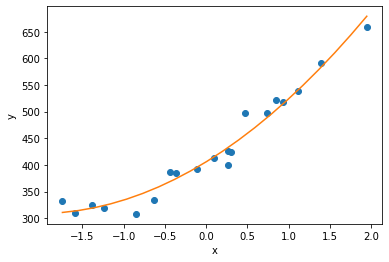

In [88]:
# 곡선에 대응하는 x 값 산출 => devide startx ~ endx into 20 section 
x_axis = np.linspace(startx, endx, len(x))
y_axis = f(to_matrix(x_axis)) 

print(x_axis)
print(y_axis)

plt.plot(train_z, train_y, 'o')
plt.plot(x_axis, y_axis)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [89]:
x = 200
x_z = (x - np.mean(train_x)) / np.std(train_x)
print('x_z:', x_z)

mdata = to_matrix(x_z)
print(mdata)

test = mdata[0]
print(test)

pd=f(test)
print('pd:', pd)

x_z: 0.8718321427450227
[[1.         0.87183214 0.76009129]]
[1.         0.87183214 0.76009129]
pd: 506.3413889001511


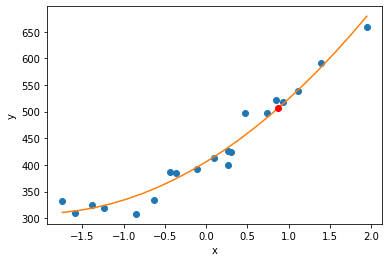

In [90]:
plt.plot(train_z, train_y, 'o')
plt.plot(x_axis, y_axis)
plt.plot(x_z, pd, 'ro')
plt.xlabel('x')
plt.ylabel('y')
plt.show()